In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

## Ecuación de Transporte

Hallar $u(x,t)$, con $(x,t)\in \Omega = [ x_0,x_1 ]\times [0, T]$, tal que:

$$\dfrac{\partial u}{\partial t} +  c \dfrac{\partial u}{\partial x} = 0, \hspace{1cm}(x,t)\in \hbox{Int}(\Omega). $$
Considere la condición de inicial $u(x,0)=u_0$ y condición de borde $u(x_0, t) = f(t)$

Sea $u(x_j,t_n) \approx U_j^n$. Usando el esquema Lax-Friedrichs:

$$ \dfrac{U_j^{n+1} - \dfrac{1}{2}\left(U_{j+1}^{n} + U_{j-1}^{n}\right)}{k} + c \dfrac{U_{j+1}^{n} - U_{j-1}^{n}}{2h} = 0$$
El esquema es estable si se satisface $|ck/h|<1$, donde $k$ es el paso en el tiempo y $h$ es el paso espacial. Despejando $U_{j}^{n+1}$ el esquema queda:

$$U_j^{n+1} = \dfrac{1}{2}\left(U_{j+1}^{n} + U_{j-1}^{n}\right) - \dfrac{ck}{2h} \left( U_{j+1}^{n}- U_{j-1}^{n}\right)$$

In [54]:
# Condición inicial
def f(x):
    return np.zeros_like(x)

# Condicion de borde
def g(t):
    return np.exp(-(t-2)**2/0.1)

In [55]:
Nx = 200
Nt = 2000
c = 2
x_min, x_max = 0, 2
t_min, t_max = 0, 4
x = np.linspace(x_min, x_max, Nx)
t = np.linspace(t_min, t_max, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# Condición de estabilidad
print(np.abs(c*dt/dx))

0.39819909954977484


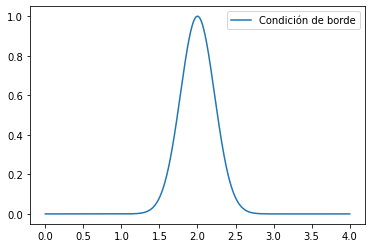

In [56]:
# Gráfica condición de borde
plt.plot(t,g(t), label = 'Condición de borde')
plt.legend()
plt.show()

In [57]:
# Esquema Lax-Friedrichs
U = np.zeros((Nt, Nx))
U[0] = f(x)
U[:,0] = g(t)
for n in range(Nt-1):
    for i in range(1, Nx-1):
        U[n+1, i] = 0.5 * (U[n, i+1] + U[n, i-1]) - 0.5 * c*dt/dx*(U[n, i+1] - U[n, i-1])
    U[n+1, -1] = U[n+1, -2]

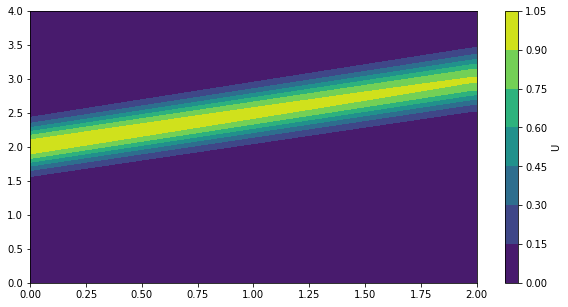

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
U_plot = ax.contourf(x, t, U)
fig.colorbar(U_plot, label='U')
plt.show()

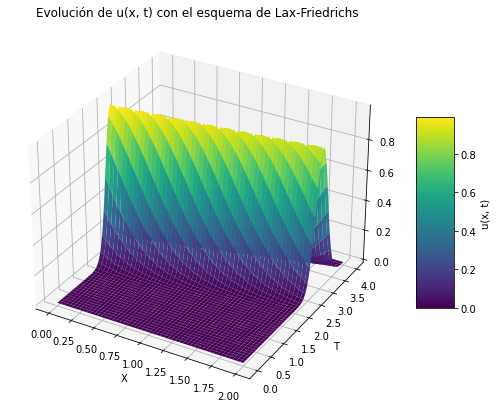

In [62]:
X, T = np.meshgrid(x,t) 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, T, U, cmap='viridis')

# Añadir una barra de colores
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='u(x, t)')

# Añadir etiquetas
ax.set_title('Evolución de u(x, t) con el esquema de Lax-Friedrichs')
ax.set_xlabel('X')
ax.set_ylabel('T')

plt.show()